The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

In [27]:
#Import Dependencies
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import StandardScaler

In [28]:
#Correct Example 2 KMeans
#Compare the observed classification and unsupervised clusters

#Load dataset
data = pd.read_excel('diabetes.xlsx')
print(data.head())
print("\n")
X = data.drop(['Classification'], axis=1)
true_class = data['Classification']
print(X.head())
print("\n")
print(true_class.head())
print("\n")

#Perform Clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")

#Print off the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
#Note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")


#Evaluate Clustering Performance
#adjusted Rand index is a function that measures the similarity of the two assignments, 
#ignoring permutations and with chance normalization
#Values are from -1 to 1. +1 - perfect match; 0 and -ve value members are split across different clusters
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html
print("Clustering Performance Evaluation")
print("Adjusted Rand index - R Score", metrics.adjusted_rand_score(true_class, cluster_class)) 
print("Note the range should be -1 to 1; Positive values means similarity is high. 0 and negative means members are split across different clusters")
print("\n")

#Plot
#Cannot have a plot because it is hyperplane\
#Look at Example 3 for 2 predictors
#Look at Example 4 for 3 predictors


#Use the clusters to predict the classification for a set of inputs
input = [[48, 20, 80, 5, 0.5, 5.6, 13, 12, 300]]
pred_class = kmeans.predict(input)
print("The predicted classification is ")
print(pred_class)

input2 = [[65, 40, 130, 20, 1.5, 30, 21, 15, 700]]
pred_class2 = kmeans.predict(input2)
print("The predicted classification is ")
print(pred_class2)


   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.36

C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0]


The kmeans labels are: 
[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0]


[[ 56.56470588  27.0235648   94.94117647   9.11237647   2.27242944
   25.70536235  10.74593924  12.16660941 372.1204    ]
 [ 59.32258065  29.11360799 105.61290323  12.47903226   3.85361469
   29.10946774   8.63150145  21.74355613 980.28445161]]


Clustering Performance Evaluation
Adjusted Rand index - R Score -0.008840256086783467
Note the range should be -1 to 1; Positive values means similarity is high. 0 and negative means members are split across different clusters


The predicted classifi

C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Type the following (With Scaling and Transformation)
#Compare the observed classification and unsupervised clusters

In [29]:
#Load dataset
data = pd.read_excel('diabetes.xlsx')
print(data.head())
print("\n")
X = data.drop(['Classification'], axis=1)
true_class = data['Classification']
print(X.head())
print("\n")
print(true_class.head())
print("\n")
 
#Pre-processing - scaling and transformation
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
 
 
#Perform Clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_std)
cluster_class = kmeans.predict(X_std)
print(cluster_class)
print("\n")
 
#Print off the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
#Note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")
 
 
#Evaluate Clustering Performance
#adjusted Rand index is a function that measures the similarity of the two assignments, 
#ignoring permutations and with chance normalization
#Values are from -1 to 1. +1 - perfect match; 0 and -ve value members are split across different clusters
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html
print("Clustering Performance Evaluation")
print("Adjusted Rand index", metrics.adjusted_rand_score(true_class, cluster_class))
print("\n")
 
#Plot
#Cannot have a plot because it is hyperplane
#Look at Example 3 for 2 predictors
#Look at Example 4 for 3 predictors
 
 
#Use the clusters to predict the classification for a set of inputs
input = [[48, 20, 80, 5, 0.5, 5.6, 13, 12, 300]]
input_std = scaler.fit_transform(input)
pred_class = kmeans.predict(input_std)
print("The predicted classification is ")
print(pred_class)
 
input2 = [[65, 40, 130, 20, 1.5, 30, 21, 15, 700]]
input2_std = scaler.fit_transform(X)
pred_class2 = kmeans.predict(input2_std)
print("The predicted classification is ")
print(pred_class2)


   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.36

C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 1]


The kmeans labels are: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 1]


[[-0.00522188 -0.40909557 -0.31088969 -0.38164488 -0.35451694 -0.40740511
   0.13425253 -0.2925298  -0.23820079]
 [ 0.01071859  0.83972249  0.638142    0.78337633  0.72769267  0.8362526
  -0.27557098  0.6004559   0.48893847]]


Clustering Performance Evaluation
Adjusted Rand index 0.0018658897581825579


The predicted classification is 
[0]
The predicted classification is 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


           BMI  Glucose
0    23.500000       70
1    20.690495       92
2    23.124670       91
3    21.367521       77
4    21.111111       92
..         ...      ...
111  26.850000       92
112  26.840000      100
113  32.050000       97
114  25.590000       82
115  27.180000      138

[116 rows x 2 columns]


0      1
1      1
2    

C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 0]


The kmeans labels are: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 0]


[[ 30.87447187 153.        ]
 [ 27.23719681  92.00952381]]


-0.002574960846639924




C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Center for cluster 0 is  [ 28.00392767 104.59375   ]
Center for cluster 1 is  [ 31.75171821 135.875     ]
Center for cluster 2 is  [24.87216202 76.72222222]
Center for cluster 3 is  [ 28.53514827 198.66666667]
Center for cluster 4 is  [22.8886934 92.28     ]
Center for cluster 5 is  [31.46212429 87.53333333]


The predicted cluster is 
[4]
The predicted cluster  is 
[5]
The predicted cluster  is 
[0]


C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


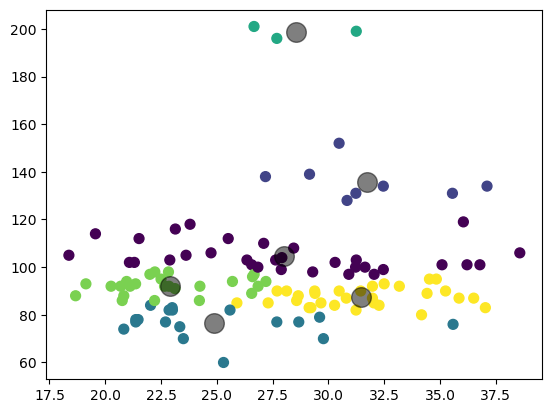

In [30]:
#Correct but Not Good Example 3 2D Plot (2 predictors) but clustering outcome is not good - see the plots
#Load dataset
data = pd.read_excel('diabetes.xlsx')
print(data.head())
print("\n")

#Select columns for X
X = data[['BMI', 'Glucose']]

true_class = data['Classification']
print(X)
print("\n")
print(true_class)
print("\n")

#Perform Clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")

#Print off the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
#Note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")

#Evaluate Clustering Performance
#adjusted Rand index is a function that measures the similarity of the two assignments, 
#ignoring permutations and with chance normalization
print(metrics.adjusted_rand_score(true_class, cluster_class))
print("\n")

#Plot the graphs
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X['BMI'], X['Glucose'], c=y_kmeans, s=50, cmap='viridis')

#plot the centers
centers = kmeans.cluster_centers_
print("Center for cluster 0 is ", centers[0])
print("Center for cluster 1 is ", centers[1])
print("Center for cluster 2 is ", centers[2])
print("Center for cluster 3 is ", centers[3])
print("Center for cluster 4 is ", centers[4])
print("Center for cluster 5 is ", centers[5])
print("\n")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
#Challenge - plot the centers with labels (0-5)
#Resource https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python

#Prediction of cluster
input = [[20.0, 93.6]]
pred_cluster = kmeans.predict(input)
print("The predicted cluster is ")
print(pred_cluster)


input2 = [[65.0, 83.6]]
pred_cluster2 = kmeans.predict(input2)
print("The predicted cluster  is ")
print(pred_cluster2)

input3 = [[14.8, 110.0]]
pred_cluster3 = kmeans.predict(input3)
print("The predicted cluster  is ")
print(pred_cluster3)


Compare the results of k-means clustering with and without scaling and transformation
We shall use the iris.csv dataset. Clustering (k = 3) will be based on 2 features, sepal width and sepal length

   sepal_length  sepal_width  petal_length  petal_width    name
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


     sepal_length  sepal_width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: name, Length: 150, dtyp

C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


The kmeans labels are: 
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


[[5.77358491 2.69245283]
 [6.81276596 3.07446809]
 [5.006      3.418     ]]


Adjusted Rand Index - R Score is  0.6006861021484542


The predicted cluster is 
[2]
The predicted cluster  is 
[0]
The predicted cluster  is 
[2]


C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


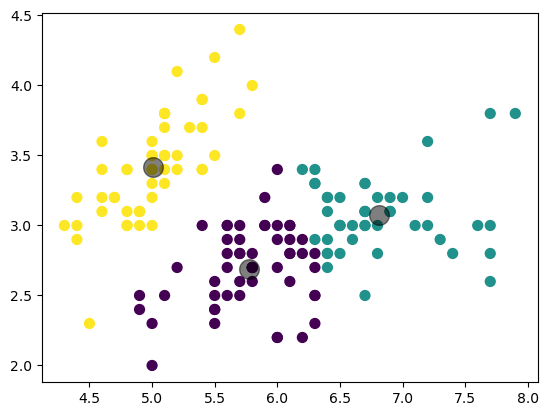

In [37]:
#Example 4 - Correct and Good Example of K-Means Clustering using the iris dataset (2 features)
#Load dataset
data = pd.read_csv('iris.csv')
print(data.head())
print("\n")

#Select feature columns and assign to X
feature_cols = ['sepal_length', 'sepal_width']
X = data[feature_cols]
true_class = data['name']
print(X)
print("\n")
print(true_class)#setosa....
print("\n")

#Perform Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)#k = 3
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")

#Print off the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
#Note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")

#Evaluate Clustering Performance
#adjusted Rand index is a function that measures the similarity of the two assignments, 
#ignoring permutations and with chance normalization
print("Adjusted Rand Index - R Score is ", metrics.adjusted_rand_score(true_class, cluster_class))
print("\n")

#Plot the graphs
plt.scatter(X['sepal_length'], X['sepal_width'], c=cluster_class, s=50, cmap='viridis')

#plot the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


#Prediction of cluster based on the iput feature values
input = [[5.0, 3.6]]
pred_cluster = kmeans.predict(input)
print("The predicted cluster is ")
print(pred_cluster)


input2 = [[6.0, 1.6]]
pred_cluster2 = kmeans.predict(input2)
print("The predicted cluster  is ")
print(pred_cluster2)

input3 = [[2.8, 4.6]]
pred_cluster3 = kmeans.predict(input3)
print("The predicted cluster  is ")
print(pred_cluster3)


   sepal_length  sepal_width  petal_length  petal_width    name
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


     sepal_length  sepal_width  petal_length
0             5.1          3.5           1.4
1             4.9          3.0           1.4
2             4.7          3.2           1.3
3             4.6          3.1           1.5
4             5.0          3.6           1.4
..            ...          ...           ...
145           6.7          3.0           5.2
146           6.3          2.5           5.0
147           6.5          3.0           5.2
148           6.2          3.4           5.4
149           5.9          3.0           5.1

[150 rows x 3 columns]


0         setosa
1         setosa
2         seto

C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


The kmeans labels are: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


[[5.84655172 2.73275862 4.3637931 ]
 [5.006      3.418      1.464     ]
 [6.83571429 3.06428571 5.6547619 ]]


Adjusted Rand Index is 0.7021065635057377


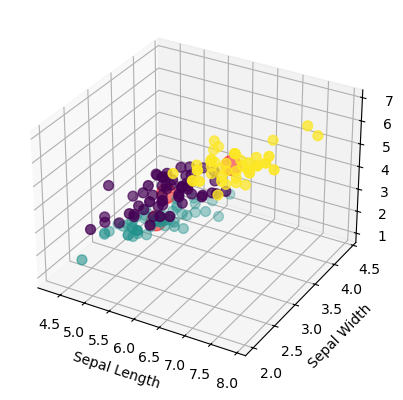

The predicted cluster is 
[1]
The predicted cluster  is 
[2]
The predicted cluster  is 
[1]


C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Solomon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [32]:
#Example 5 - Correct and Good Example of K-Means Clustering using the iris dataset (3 features)
#Load dataset
data = pd.read_csv('iris.csv')
print(data.head())
print("\n")

#Select columns for X
X = data[['sepal_length', 'sepal_width', 'petal_length']]
true_class = data['name']
print(X)
print("\n")
print(true_class)
print("\n")

#Perform Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")

#Print off the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
#Note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")

#Evaluate Clustering Performance
#adjusted Rand index is a function that measures the similarity of the two assignments, 
#ignoring permutations and with chance normalization
print("Adjusted Rand Index is", metrics.adjusted_rand_score(true_class, cluster_class))


#Plot the graphs
#https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['sepal_length'], X['sepal_width'], X['petal_length'], c=cluster_class, s=50, cmap='viridis')

#plot the centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.5);

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()


#Prediction of cluster
input = [[5.0, 3.6, 1.7]]
pred_cluster = kmeans.predict(input)
print("The predicted cluster is ")
print(pred_cluster)


input2 = [[6.0, 3.6, 5.6]]
pred_cluster2 = kmeans.predict(input2)
print("The predicted cluster  is ")
print(pred_cluster2)

input3 = [[4.8, 4.6, 3.2]]
pred_cluster3 = kmeans.predict(input3)
print("The predicted cluster  is ")
print(pred_cluster3)


Task Above
Scale and transform the input features and view the outputs. Compare clustering results with and without scaling and transformation.


Association Rules
It is a data mining approach. Apriori is an algorithm for frequent item set mining and association rule learning over relational databases.


Measures of Association Rules Mining
Support refers to items’ frequency of occurrence. Support is the relative frequency that the rules show up. It is the ratio of transactions involving a particular item to the total number of transactions. It defines the popularity of an item. It ranges between 0 and 1.

Confidence is a conditional probability. Confidence is a measure of the reliability of the rule. It is the ratio of number of transactions involving two items X and Y by the number of transactions involving X. Therefore, it tells the possibility of how often items X and Y occur together, given the number of times X has occurred. It ranges between 0 and 1.

Lift is the ratio of the observed support to that expected if the two rules were independent. If a lift value is close to 1 then both the rules were completely independent. Lift indicates certainty of a rule. How much sale of X has increased when B is sold?

Leverage
Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. An leverage value of 0 indicates independence.

Conviction
A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.

Measures of Association Rules Mining
Support refers to items’ frequency of occurrence. Support is the relative frequency that the rules show up. It is the ratio of transactions involving a particular item to the total number of transactions. It defines the popularity of an item. It ranges between 0 and 1.

Confidence is a conditional probability. Confidence is a measure of the reliability of the rule. It is the ratio of number of transactions involving two items X and Y by the number of transactions involving X. Therefore, it tells the possibility of how often items X and Y occur together, given the number of times X has occurred. It ranges between 0 and 1.

Lift is the ratio of the observed support to that expected if the two rules were independent. If a lift value is close to 1 then both the rules were completely independent. Lift indicates certainty of a rule. How much sale of X has increased when B is sold?

Leverage
Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. An leverage value of 0 indicates independence.

Conviction
A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.


In [33]:
#Example 1 Apriori Algorithms
#http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/ 

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

#transform it into the right format via the TransactionEncoder
te = TransactionEncoder()
trans_data = te.fit(dataset).transform(dataset)
dframe = pd.DataFrame(trans_data, columns=te.columns_)
print(dframe)
print("\n")

#return the items and itemsets with at least 60% support - at least 60% of occurrences
#The outputs are column number starting from Column 0, 1, 2...
print(apriori(dframe, min_support=0.6))
print("\n")

#Convert the column number to names. Column 0 is support; column 1 is itemsets
print(apriori(dframe, min_support=0.6, use_colnames=True))
print("\n")

#We would like to list the number of items in a set for a particular support => 0.6
frequent_itemsets = apriori(dframe, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)
print("\n")

#Further filters. Query 1: 2 items in itemset and support >=0.8 i.e items frequency of occurence(80%) 
query1 = frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.8) ]
print(query1)
print("\n")

query2 = frequent_itemsets[ (frequent_itemsets['length'] >= 3) &
                   (frequent_itemsets['support'] >= 0.6) ]
print(query2)
print("\n")


#Association Rules
#interested in rules derived from the frequent itemsets only if the level of confidence is above
#the 70 percent threshold (min_threshold=0.7):
basket_association_rules = association_rules(frequent_itemsets, 
                                             metric="confidence", min_threshold=0.7)
print("Association Rules based on confidence")
print(basket_association_rules)
print("\n")


basket_association_rules2 = association_rules(frequent_itemsets, 
                                             metric="lift", min_threshold=1.2)
print("Association Rules based on lift")
print(basket_association_rules2)
print("\n")


#Compute Antecedent length (i.e. number of items in the set)
basket_association_rules2["antecedent_len"] = basket_association_rules2["antecedents"].apply(lambda x: len(x))
print("Add a column with the number of antecedents")
print(basket_association_rules2)
print("\n")

#Only choose association rules with length of antecedents >=2, confidence >0.75, lift >1.2
rules = basket_association_rules2[ (basket_association_rules2['antecedent_len'] >= 2) &
       (basket_association_rules2['confidence'] > 0.75) &
       (basket_association_rules2['lift'] > 1.2) ]

print("Association rules that meet the requirements")
print(rules)
print("\n")

#Export rules to an excel file
basket_association_rules2.to_excel('Example1_results.xlsx', engine='xlsxwriter')


   Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False  


    support   itemsets
0       0.8        (3)
1       1.0        (5)
2       0.6        (6)
3       0.6        (8)
4       0.6       (10)
5       0.8     (3, 5)
6       0.6     (8, 3)
7       0.6     (5, 6)
8       0.6     (8, 5)
9       0.6    (10, 5)
10      0.6  (8, 3, 5)


    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidn

Example 2.1. We shall use Online_Retail.xlsx dataset.
We shall group the purchase by countries. Explanation are embedded within the codes.


In [34]:
#Basket Analysis
#No debugging yet
#https://pbpython.com/market-basket-analysis.html 
#https://pythondata.com/market-basket-analysis-with-python-and-pandas/
#https://medium.com/@jihargifari/how-to-perform-market-basket-analysis-in-python-#bd00b745b106

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

dataset = pd.read_excel('Online_Retail.xlsx')
print(dataset.head())
print(dataset.isnull().count()) #looking for missing data
print("\n")

#Basket
basket = dataset[dataset['Country'] == 'France'] #france is the super set and main basket 
print("This is basket")
print(basket)
print("\n")
basket_plus = (dataset[dataset['Country'] == 'France']
               .groupby(['InvoiceNo', 'Description'])['Quantity']
               .sum().unstack()
               .reset_index().fillna(0)
               .set_index('InvoiceNo'))
print("This is basket plus")
print(basket_plus)
print("\n")

#Encode the data to encode basket data into binary data to show 
#whether item is bought (1) or not bought (0)       
#Negative numbers are returned as 0 while more than 1 returned as 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encode_plus = basket_plus.applymap(encode_units)
print("This is basket encode plus")
print(basket_encode_plus)
print("\n")


#Filter the transactions - only focus on more than 1 items bought
#The market basket analysis will help uncover the association between 2 or more items
#bought based on historical data
#axis = 1 is for columns
basket_filter_plus = basket_encode_plus[(basket_encode_plus >0).sum(axis=1) >= 2]
print("This is basket filter plus")
print(basket_filter_plus)
print("\n")

#Apply apriori algorithm to find frequently bought items in the dataset
frequent_itemsets = apriori(basket_filter_plus, min_support = 0.03, use_colnames = True) #i.e items frequency of occurence(...30%) 
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) 
print("This is Frequent Itemsets")
print(frequent_itemsets)
print("\n")

#Apply Association Rules and Generated Rules
basket_association_rules = association_rules(frequent_itemsets, metric = 'lift',
                 min_threshold =1).sort_values('lift', ascending = False).reset_index(drop=True)
print("This is a list of association rules")
print(basket_association_rules)    
print("\n")

#Export rules to a text file
basket_association_rules.to_excel('Example2_results.xlsx', engine='xlsxwriter') #writing rules as an excel file
    


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
InvoiceNo      541909
StockCode      541909
Description    541909
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     541909
Country        541909
dtype: int64


C:\Users\Solomon\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
